# HDSC2022 Capstone Project
## by Team Prophet

The data was collected through web scraping https://www.cucas.edu.cn/china_scholarships/ <br>
The code to the web scraping program and data cleaning program is stored in https://github.com/mcmuralishclint/CUCAS <br>
The dataset contains information about the scholarship programs in China as of May 2019. <br>

The goal of this project is to ... .

In [51]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We are going to read the csv file using read_csv() function 
initial_data = pd.read_csv('./data/original.csv')

In [3]:
initial_data.head()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH


To have a perfect model, we decided to add more information to the dataset

In [4]:
# We are going to read the csv file using read_excel() function 
data = pd.read_excel('./data/china_scholarship.xls')  #might also need to pip install xlrd
#data is our upgraded dataset

In [5]:
data.head()

,schol_id,University,Major,Location / District,Province / City,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Xuhui,Shanghai,Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750,MONTH,1000,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Qingdao,Shandong,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0,YEAR,0,MONTH


In [6]:
initial_data.columns

Index(['schol_id', 'University', 'Major', 'Level', 'Language',
       'Tuition Covered', 'Accomodation covered?', 'Living Expense Covered?',
       'Tuition fees to pay', 'Original Tuition fee', 'Start_Month',
       'Start_Year', 'Accomodation_To_Pay', 'Accomodation_duration',
       'Expense_To_Pay', 'Expense_duration'],
      dtype='object')

In [7]:
data.columns

Index(['schol_id', 'University', 'Major', 'Location / District',
       'Province / City', 'Level', 'Language', 'Tuition Covered',
       'Accomodation covered?', 'Living Expense Covered?',
       'Tuition fees to pay', 'Original Tuition fee', 'Start_Month',
       'Start_Year', 'Accomodation_To_Pay', 'Accomodation_duration',
       'Expense_To_Pay', 'Expense_duration'],
      dtype='object')

In [8]:
# We are going to rename the columns using the snake_case naming convention to improve readability
data.columns = ['school_id', 'university', 'major', 'district', 'city', 'level', 'language', 'tuition_covered', 'accomodation_covered',
'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee','start_month','start_year', 'accomodation_to_pay',
'accomodation_duration', 'expense_to_pay', 'expense_duration']

In [9]:
# Let us view an intuitive summary of our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school_id               3576 non-null   int64  
 1   university              3576 non-null   object 
 2   major                   3576 non-null   object 
 3   district                3576 non-null   object 
 4   city                    3576 non-null   object 
 5   level                   3576 non-null   object 
 6   language                3576 non-null   object 
 7   tuition_covered         3453 non-null   float64
 8   accomodation_covered    3576 non-null   int64  
 9   living_expense_covered  3576 non-null   int64  
 10  tuition_fees_to_pay     3576 non-null   int64  
 11  original_tuition_fee    3453 non-null   float64
 12  start_month             3576 non-null   object 
 13  start_year              3576 non-null   int64  
 14  accomodation_to_pay     3576 non-null   

In [10]:
# Now let us see a preview of the data by looking at the first 5 rows 
data.head()

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Xuhui,Shanghai,Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750,MONTH,1000,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Chaoyang,Jilin,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500,MONTH,1500,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Qingdao,Shandong,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0,YEAR,0,MONTH


In [11]:
# Let us also look at the last 5 rows of the dataframe
data.tail()

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH
3575,3605,East China University of Science and Technology,Sociology of Law,Xuhui District,Shanghai,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0,YEAR,0,MONTH


In [12]:
# Let us see how many null values present in the columns 
data.isna().sum()

school_id                   0
university                  0
major                       0
district                    0
city                        0
level                       0
language                    0
tuition_covered           123
accomodation_covered        0
living_expense_covered      0
tuition_fees_to_pay         0
original_tuition_fee      123
start_month                 0
start_year                  0
accomodation_to_pay         0
accomodation_duration       0
expense_to_pay              0
expense_duration            0
dtype: int64

In [13]:
# Let us view the descriptive statistics of the dataframe. Note that this can only be applied to numerical values 
data[['tuition_covered', 'tuition_fees_to_pay', 'original_tuition_fee', 'accomodation_to_pay', 'expense_to_pay']].describe().T

,count,mean,std,min,25%,50%,75%,max
tuition_covered,3453.0,20531.704315,12428.124918,0.0,10625.0,20000.0,26500.0,80000.0
tuition_fees_to_pay,3576.0,8433.516499,9519.340675,0.0,0.0,6000.0,11000.0,69000.0
original_tuition_fee,3453.0,28693.955980,15341.450293,0.0,20000.0,26500.0,34000.0,148000.0
accomodation_to_pay,3576.0,1376.461969,2802.526970,0.0,400.0,900.0,1200.0,24000.0
expense_to_pay,3576.0,1070.987136,601.297528,0.0,1000.0,1000.0,1500.0,2700.0


## Data Preprocessing

In [15]:
temp = data[['original_tuition_fee', 'tuition_covered', 'tuition_fees_to_pay']]
temp["check"] = data['original_tuition_fee'] - data['tuition_covered']
temp

,original_tuition_fee,tuition_covered,tuition_fees_to_pay,check
0,7500.0,7500.0,0,0.0
1,20000.0,10000.0,10000,10000.0
2,20000.0,10000.0,10000,10000.0
3,20000.0,10000.0,10000,10000.0
4,7000.0,7000.0,0,0.0
...,...,...,...,...
3571,38950.0,38950.0,0,0.0
3572,38950.0,38950.0,0,0.0
3573,38950.0,38950.0,0,0.0
3574,38950.0,38950.0,0,0.0


In [16]:
print((temp['tuition_fees_to_pay'] != temp['check']).sum())

123


In [17]:
temp[temp['tuition_fees_to_pay'] != temp['check']]

,original_tuition_fee,tuition_covered,tuition_fees_to_pay,check
883,NaN,NaN,15000,NaN
1029,NaN,NaN,15000,NaN
2395,NaN,NaN,16200,NaN
2396,NaN,NaN,16200,NaN
2397,NaN,NaN,16200,NaN
...,...,...,...,...
3260,NaN,NaN,16200,NaN
3261,NaN,NaN,16200,NaN
3262,NaN,NaN,0,NaN
3320,NaN,NaN,16200,NaN


### Tuition to pay
There are only 123 instances where the difference between orignal tuition and tuition covered is not equal to tuition to pay. <br> and this number 123 corresponds to the number of missing values  for both tuition covered and original tuition. <br>
Based on the above, tuition to pay is not a good target for prediction.

In [18]:
data["accomodation_duration"].value_counts()

MONTH       2575
YEAR         774
DAY          116
TERM          59
SEMESTER      27
-1            25
Name: accomodation_duration, dtype: int64

In [55]:
newdata = data.copy()

#convert per year to per month
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "YEAR"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "YEAR"] / 12

#convert per day to per month using an average of 30 days per month
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "DAY"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "DAY"] * 30

#convert per term to per month
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "TERM"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "TERM"] / 12

#convert per semester to per month using 4.5 months (18weeks) per semester
newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "SEMESTER"] = newdata['accomodation_to_pay'][newdata['accomodation_duration'] == "SEMESTER"] / 12

newdata.sample(5)

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration
1951,1981,Southwest University of Science and Technology,Chemistry,Fuchen,Sichuan,Master,Chinese,26500.0,1,1,12500,39000.0,Sep,2019,600.0,MONTH,500,MONTH
182,212,Shandong Jianzhu University,Civil Engineering,Licheng,Shandong,Bachelor,English,9000.0,0,0,12000,21000.0,Sep,2019,1500.0,MONTH,500,MONTH
2532,2562,Shanghai University of Traditional Chinese Med...,Translatology(Translation of Traditional Chine...,Xuhui,Shanghai,Master,English,29500.0,1,1,0,29500.0,Sep,2020,1000.0,MONTH,1000,MONTH
3194,3224,Shandong University,Archaeology,Licheng District,Shandong,Phd,Chinese,25000.0,0,0,6000,31000.0,Sep,2019,810.0,MONTH,1500,MONTH
2335,2365,North China Electric Power University,Public Management,Changping,Beijing,Master,English,22500.0,0,0,7500,30000.0,Sep,2019,1200.0,MONTH,1500,MONTH


In [56]:
temp2 = data[['living_expense_covered', 'expense_to_pay', "expense_duration"]]
temp2

,living_expense_covered,expense_to_pay,expense_duration
0,0,1000,MONTH
1,0,1500,MONTH
2,0,1500,MONTH
3,0,1500,MONTH
4,1,0,MONTH
...,...,...,...
3571,1,0,MONTH
3572,1,0,MONTH
3573,1,0,MONTH
3574,1,0,MONTH


In [57]:
data["expense_duration"].value_counts()

MONTH    3576
Name: expense_duration, dtype: int64

### Accomodation to pay
Accomodation to pay is always zero when accomodation is covered.

### Expense to pay
Expense to pay is zero when living expenses are covered. <br>
Drop expense_duration as it is always per month, there's nothing to learn from it.

In [58]:
#Create total expense to pay, sum of tuition to pay, accomodation to pay and expense to pay.
newdata["total_expense"] = newdata[["tuition_fees_to_pay", "accomodation_to_pay", "expense_to_pay"]].sum(axis=1)
newdata.sample(5)

,school_id,university,major,district,city,level,language,tuition_covered,accomodation_covered,living_expense_covered,tuition_fees_to_pay,original_tuition_fee,start_month,start_year,accomodation_to_pay,accomodation_duration,expense_to_pay,expense_duration,total_expense
1125,1155,Dongguan University of Technology,Communication Engineering,Dongguan,Guangdong,Bachelor,Chinese,22500.0,0,0,0,22500.0,Sep,2019,416.666667,YEAR,900,MONTH,1316.666667
529,559,South China University of Technology,Tourism Management,Tianhe,Guangdong,Bachelor,Chinese,17550.0,0,0,6500,24050.0,Sep,2019,1000.000000,MONTH,1000,MONTH,8500.000000
1842,1872,Jiangsu University,Agricultural Engineering,Zhenjiang,Jiangsu,Master,English,20000.0,0,0,9000,29000.0,Sep,2019,1000.000000,MONTH,1000,MONTH,11000.000000
615,645,University of Science and Technology Beijing,Japanese,Haidian,Beijing,Bachelor,Chinese,23300.0,1,1,0,23300.0,Sep,2019,0.000000,YEAR,0,MONTH,0.000000
51,52,China University of Petroleum - Beijing,(Top 300 Program)Industrial Economics,Changping,Beijing,Non-Degree,English,25000.0,1,1,0,25000.0,Feb,2020,0.000000,YEAR,0,MONTH,0.000000


In [59]:
newdata.columns

Index(['school_id', 'university', 'major', 'district', 'city', 'level',
       'language', 'tuition_covered', 'accomodation_covered',
       'living_expense_covered', 'tuition_fees_to_pay', 'original_tuition_fee',
       'start_month', 'start_year', 'accomodation_to_pay',
       'accomodation_duration', 'expense_to_pay', 'expense_duration',
       'total_expense'],
      dtype='object')

In [60]:
#remove redundant columns
redund_cols = ['tuition_fees_to_pay', 'original_tuition_fee',
               'accomodation_to_pay', 'tuition_covered',
               'accomodation_duration', 'expense_to_pay', 'expense_duration',
              "school_id", "major", "city"]
newdata = newdata.drop(columns=redund_cols)

In [61]:
newdata

,university,district,level,language,accomodation_covered,living_expense_covered,start_month,start_year,total_expense
0,Shanghai University of Traditional Chinese Med...,Xuhui,Non-Degree,English,0,0,Jun,2020,10750.0
1,Changchun University of Science and Technology,Chaoyang,Non-Degree,Chinese,0,0,Sep,2019,13000.0
2,Changchun University of Science and Technology,Chaoyang,Non-Degree,Chinese,0,0,Sep,2019,13000.0
3,Changchun University of Science and Technology,Chaoyang,Non-Degree,Chinese,0,0,Sep,2019,13000.0
4,Qingdao University,Qingdao,Non-Degree,Chinese,1,1,Sep,2019,0.0
...,...,...,...,...,...,...,...,...,...
3571,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0.0
3572,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0.0
3573,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0.0
3574,East China University of Science and Technology,Xuhui District,Phd,English,1,1,Sep,2019,0.0


### Inspect columns in new data

In [62]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              3576 non-null   object 
 1   district                3576 non-null   object 
 2   level                   3576 non-null   object 
 3   language                3576 non-null   object 
 4   accomodation_covered    3576 non-null   int64  
 5   living_expense_covered  3576 non-null   int64  
 6   start_month             3576 non-null   object 
 7   start_year              3576 non-null   int64  
 8   total_expense           3576 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 251.6+ KB


In [63]:
newdata["district"].nunique()

40

In [64]:
newdata["district"].unique()

array(['Xuhui', 'Chaoyang ', 'Qingdao', 'Zhongyuan', 'Xicheng Qu',
       'Jiangbei ', 'Shinan', 'Changping', 'Haidian', "Lin'an", 'Nankai',
       'Nanchang', 'Xinbei', "Chang'an", 'Wuhan', 'Licheng', 'Wucheng',
       'Chaoyang', 'Fuchen', 'Tiexi', 'Dongxihu', 'Tianhe', 'Zhenjiang',
       'Xihu', 'Shahekou', 'Yangpu', 'Longfeng', 'Yunlong', 'Huanggu',
       'Xuzhou', 'Nanjing', 'Hexi', 'Siping', ' Fengxian', 'Jinping',
       'Dongguan', 'Yuzhong', 'Baoji', 'Licheng District',
       'Xuhui District'], dtype=object)

In [65]:
newdata = newdata.replace("Licheng District", "Licheng")
newdata = newdata.replace("Xuhui District", "Xuhui")

In [66]:
newdata["district"].nunique()

38

There are 38 unique disricts, we could predict total expense based on district.

In [67]:
newdata["level"].unique()

array(['Non-Degree', 'Bachelor', 'Master', 'Phd'], dtype=object)

In [68]:
newdata["university"].nunique()

53

In [69]:
newdata["language"].unique()

array(['English', 'Chinese', 'Japanese', 'German'], dtype=object)

In [70]:
newdata["start_month"].nunique()

5

In [71]:
newdata["start_year"].nunique()

2

In [72]:
# Let us define the predictor columns and the target column 
# X is the predictor
# y is the target variable
X = newdata.drop(['total_expense'], axis = 1)
y = newdata['total_expense']

In [73]:
# Here we are differentiating between the columns that are objects and the ones that are not
obj_cols = list(X.select_dtypes(include = 'object').columns)
num_cols = list(X.select_dtypes(exclude = 'object').columns)
print(obj_cols)
print(num_cols)

['university', 'district', 'level', 'language', 'start_month']
['accomodation_covered', 'living_expense_covered', 'start_year']


In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   university              3576 non-null   object
 1   district                3576 non-null   object
 2   level                   3576 non-null   object
 3   language                3576 non-null   object
 4   accomodation_covered    3576 non-null   int64 
 5   living_expense_covered  3576 non-null   int64 
 6   start_month             3576 non-null   object
 7   start_year              3576 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 223.6+ KB


In [75]:
#Split into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3,
                                                    random_state=0)

print(f"Train size: \nxtrain: {X_train.shape}\nytrain: {y_train.shape}",
      f"\n\nValidation size: \nxval: {X_valid.shape}\nyval: {y_valid.shape}")

Train size: 
xtrain: (2503, 8)
ytrain: (2503,) 

Validation size: 
xval: (1073, 8)
yval: (1073,)


In [102]:
#Train
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[('scale', MinMaxScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('label_enc', OneHotEncoder(handle_unknown="ignore"))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, obj_cols)])

## Random Forest

In [108]:
model = RandomForestRegressor()

# Bundle preprocessing and modeling code in a pipeline
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model) ])

scores = cross_val_score(rf_clf, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("ACC scores:\n", scores)
print(scores.mean())

ACC scores:
 [-1031.07583349  -924.54494986 -1096.55347256 -1205.04887168
  -886.05182163]
-1028.6549898416665


In [109]:
rf_clf.fit(X_train, y_train)
rf_clf.score(X_valid, y_valid)

0.9378390648855719

### Tuning

In [126]:
#Hyperopt
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

def hyp_tuning(params):
    model = RandomForestRegressor(random_state=1, n_jobs=-1, **params)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_valid)
    error = mean_squared_error(y_valid, pred)
    return {"loss": error, "status": STATUS_OK}

criteria = ["mse", "mae"]
estimators = [100, 200, 300, 400, 500, 1000]
nodes = [2, 4, 6, 7, 8]
depths = [2, 4, 5, 6, 7]
space = {'criterion': hp.choice("criterion", criteria),
         'n_estimators': hp.choice("n_estimators", estimators),
          'max_depth':hp.choice("max_depth", depths),
          'max_leaf_nodes':hp.choice("max_leaf_nodes", nodes),}

trials = Trials()
best = fmin(fn=hyp_tuning,
            space=space,
            algo=tpe.suggest, 
            trials=trials,
            max_evals=10)
print(best)

100%|███████████████████████████████████████████████| 10/10 [16:51<00:00, 101.19s/trial, best loss: 19314797.695929863]
{'criterion': 1, 'max_depth': 1, 'max_leaf_nodes': 3, 'n_estimators': 5}


In [127]:
#tuned model
rf_model = RandomForestRegressor(criterion=criteria[best["criterion"]],
                                 n_estimators = estimators[best["n_estimators"]],
                                 max_leaf_nodes = nodes[best["max_leaf_nodes"]],
                                 max_depth = depths[best["max_depth"]],
                                 random_state=1)

In [128]:
#retrain with full data
rf_tuned_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', xg_model)])
rf_tuned_clf.fit(X_train, y_train)
rf_tuned_clf.score(X_valid, y_valid)

0.9384681330564435

## XGBoost

In [129]:
model = XGBRegressor(n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
xg_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model) ])

scores = cross_val_score(xg_clf, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("ACC scores:\n", scores)
print(scores.mean())

ACC scores:
 [-1164.02862889  -993.98806038 -1183.27195492 -1325.74680518
  -997.3485531 ]
-1132.8768004930992


In [130]:
xg_clf.fit(X_train, y_train)
xg_clf.score(X_valid, y_valid)

0.9395978610221237

### Tuning

In [131]:
#Hyperopt
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

def hyp_tuning(params):
    model = XGBRegressor(random_state=1, **params)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_valid)
    error = mean_squared_error(y_valid, pred)
    return {"loss": error, "status": STATUS_OK}

boosters = ["gbtree", "dart", "gblinear"]
estimators = [100, 200, 300, 400, 500, 1000]
space = {'booster': hp.choice("booster", boosters),
         'n_estimators': hp.choice("n_estimators", estimators),
         "learning_rate":hp.uniform("learning_rate", 0.1, 1),
         'subsample': hp.uniform('subsample', 0.5, 1),
          'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1),
          'colsample_bylevel': hp.uniform('colsample_bylevel', 0.4, 1),
          'lambda':hp.randint("lambda", 5),
          'alpha':hp.randint("alpha", 5),}

trials = Trials()
best = fmin(fn=hyp_tuning,
            space=space,
            algo=tpe.suggest, 
            trials=trials,
            max_evals=10)
print(best)

[14:41:50] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_bylevel", "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:50] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_bylevel", "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:41:50] WARNING: ..\src\learner.cc:576:    

In [132]:
#tuned model
xg_model = XGBRegressor(booster=boosters[best["booster"]],
                         n_estimators = estimators[best["n_estimators"]],
                         learning_rate = best["learning_rate"],
                         reg_lambda=best["lambda"], 
                         alpha=best["alpha"],
                        subsample=best["subsample"],
                        colsample_bytree=best["colsample_bytree"],
                        colsample_bylevel=best["colsample_bylevel"],
                               random_state=1)

In [133]:
#retrain with full data
xg_tuned_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', xg_model)])
xg_tuned_clf.fit(X_train, y_train)
xg_tuned_clf.score(X_valid, y_valid)

0.9368233230939331

## Results Analysis

In [134]:
def show_results(actual, pred):
    rsquared = r2_score(actual, pred)
    mae = mean_absolute_error(actual, pred)
    rmse = mean_squared_error(actual, pred, squared=False)
    return pd.DataFrame([rsquared, mae, rmse], index=["$R^2$", "MAE", "RMSE"])

In [135]:
#RF
rf_base_pred = rf_clf.predict(X_valid)
rf_tuned_pred = rf_tuned_clf.predict(X_valid)

#XG
xg_base_pred = xg_clf.predict(X_valid)
xg_tuned_pred = xg_tuned_clf.predict(X_valid)

In [136]:
temp = pd.DataFrame()
temp["rf_base"] = show_results(y_valid, rf_base_pred)
temp["rf_tuned"] = show_results(y_valid, rf_tuned_pred)
temp["xg_base"] = show_results(y_valid, xg_base_pred)
temp["xg_tuned"] = show_results(y_valid, xg_tuned_pred)
temp.round(4)

,rf_base,rf_tuned,xg_base,xg_tuned
$R^2$,0.9378,0.9385,0.9396,0.9368
MAE,840.7389,894.0957,915.3490,960.4450
RMSE,2463.3221,2450.8260,2428.2231,2483.3665


In [148]:
#compare predictions to actual data
temp = pd.DataFrame()
temp["actual"] = y_valid
temp["rf_pred"] = rf_tuned_clf.predict(X_valid)
temp["xg_pred"] = xg_tuned_clf.predict(X_valid)
temp.round(3)

,actual,rf_pred,xg_pred
1290,3000.000,2992.229004,2932.493896
1150,4350.000,4367.359863,4245.713867
1077,10833.333,10670.166016,10664.097656
1981,10200.000,10241.784180,10392.101562
499,13833.333,13645.480469,14354.514648
...,...,...,...
1212,12000.000,12151.338867,12405.226562
2374,13000.000,13060.956055,12831.523438
1288,3000.000,2992.229004,2932.493896
507,8500.000,8558.349609,8421.629883


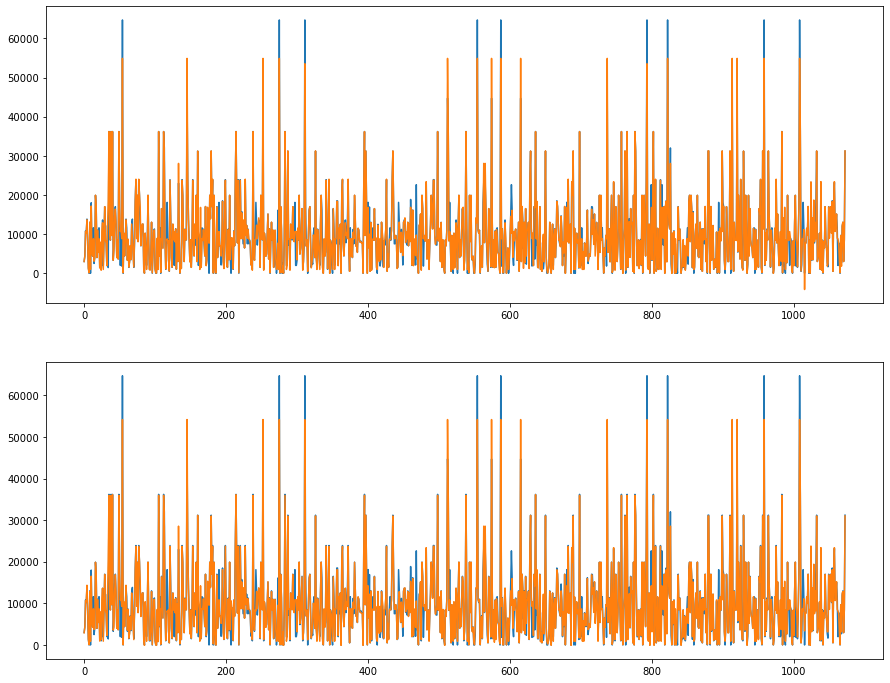

In [154]:
fig, axs = plt.subplots(2, 1, figsize=(15, 12))
ax1, ax2 = axs

temp2 = temp.reset_index(drop=True)

ax1.plot(temp2.actual)
ax1.plot(temp2.rf_pred)

ax2.plot(temp2.actual)
ax2.plot(temp2.xg_pred)